# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
df_sorted_by_sales = df.sort_values('Sales',ascending=0)
df_sorted_by_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Text(0.5, 1.0, 'Ventas por compañía')

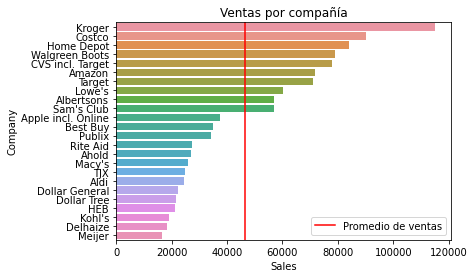

In [ ]:
df_without_walmart=df_sorted_by_sales[df_sorted_by_sales.Company != 'Walmart US']
mean_sales = df_without_walmart['Sales'].mean()
fig, ax= plt.subplots()
sn.barplot(data=df_without_walmart,x='Sales',y='Company',ax=ax)
ax.axvline(mean_sales,0,10,color='red',label='Promedio de ventas')
plt.legend()
plt.title('Ventas por compañía')


Aspectos a destacar: 

- El promedio de ventas es de aproximadamente 46,600

- La mayoría de empresas esta por debajo del promedio de ventas. 

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Text(0.5, 0, 'Ventas (Millones de Dolares)')

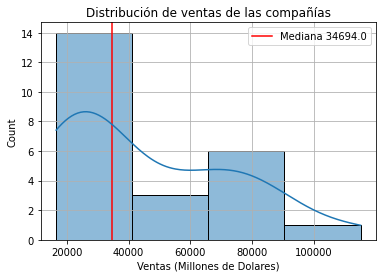

In [ ]:
#Tomamos la mediana de la ventas
mediana = df_without_walmart.Sales.median()
#Para graficar
fig,ax=plt.subplots()
#Graficamos la mediana
ax.axvline(mediana,0,9,color='red',label='Mediana %s'%mediana)
#sn.barplot(data=df_without_walmart,x='Sales',y='Company',ax=ax)
ax.legend()
sn.histplot(data=df_without_walmart,x='Sales',kde=True,bins=4,ax=ax)
ax.grid()
df_without_walmart.Sales.min()
plt.title("Distribución de ventas de las compañías")
plt.xlabel('Ventas (Millones de Dolares)')

-Excluyendo a Walmart de las compañías, se observa en el histograma de anterior que al menos 14 compañías (de 24)  generaron ventas entre 16 mil y mas de 40 mil millones de dólares.

-Si se desea estar a la par de los competidores mas grandes se deben superar ese rango de ventas

-Se debe observar que la mediana de las ventas es de aproximadamente 35 mil millones de dólares. Se sugiere superar esta valor como inicio para entrar entre los competidores con grandes ventas.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

231.0

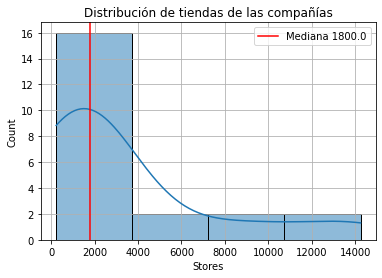

In [ ]:
fig,ax= plt.subplots()
mediana = df_without_walmart.Stores.median()
sn.histplot(data=df_without_walmart,x='Stores',ax=ax,bins=4,kde=True)
ax.axvline(mediana,0,10,color='red',label='Mediana %s'%mediana)
ax.grid()
ax.legend()
plt.title('Distribución de tiendas de las compañías')
df_without_walmart.Stores.min()

-El numero de tiendas de la mayoría de las compañías(16/23) va desde 231 hasta aproximadamente 4000 tiendas.

-La mediana del numero de tiendas es de1800 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

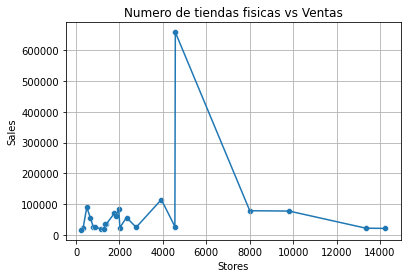

In [ ]:
#Tomando la ventas 
sn.lineplot(data=df,x='Stores',y='Sales')
sn.scatterplot(data=df,x='Stores',y='Sales',)
plt.title('Numero de tiendas fisicas vs Ventas')
plt.grid()

Conclusiones:

-No hay una correlación lineal entre la cantidad de tiendas y las ventas.

- Hay compañías tienen la mayor cantidad de tiendas pero no la mayor cantidad de ventas.

- Tener una mayor cantidad de tiendas no asegura tener mayores ventas.

-Se debe encontrar que otros factores generan mayor cantidad de ventas. 

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
rango_sales= df_without_walmart.Sales.max() - df_without_walmart.Sales.min()
rango_sales

98445

-El rango es de 98,445 millones, es decir, que de una tienda a otra puede haber esa diferencia de ventas.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

[Text(0.5, 1.0, 'Top 5 compañías con mas ventas')]

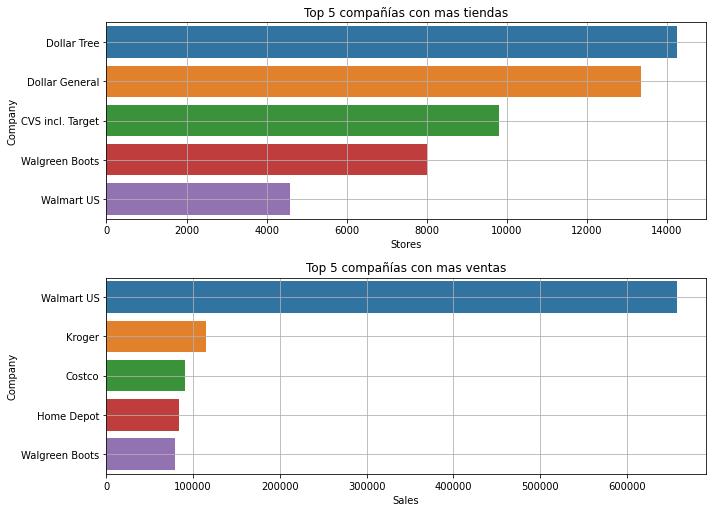

In [ ]:
#Ordenar por Stores
df_sorted_by_stores = df.sort_values('Stores',ascending=0)
#Top 5 de las empresas con mas tiendas
df_sorted_by_stores_top_5 = df_sorted_by_stores[0:5]
#Top 5 de las empresas con ventas
df_sorted_by_sales_top_5 = df_sorted_by_sales[0:5]
#Interseccion 
mas_ventas_y_tiendas = np.intersect1d(df_sorted_by_sales_top_5.Company,df_sorted_by_stores_top_5.Company)

fig, (ax,bx)= plt.subplots(2,1, figsize=(10,7))
sn.barplot(data=df_sorted_by_sales_top_5,x='Sales',y='Company',ax=bx)
sn.barplot(data=df_sorted_by_stores_top_5,x='Stores',y='Company',ax =ax)
ax.grid()
bx.grid()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
ax.set(title='Top 5 compañías con mas tiendas')
bx.set(title='Top 5 compañías con mas ventas')



Conclusiones:

1. La compañía que posee mas tiendas es Dollar Tree. La empresa Dollar General esta muy cerca de alcanzar ese numero de tiendas.

2. Se puede observar que Walmart y Walgreen Boots son las empresas que tienen tanto mas tiendas como mas ventas.

3. A pesar de que Walmart es la que mas ventas tiene, es la que menos tiendas posee, por lo que no se puede decir que entre mas tiendas, mas ventas. De hecho la mayoría de las empresas(3/5) que tienen mas tiendas no están en las 5 que tiene mas ventas.

4. Generar mas ventas no depende de tener un mayor numero de tiendas, por lo que no es aconsejable concentrarse en el numero de tiendas si quiere mas ventas.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


42452.0

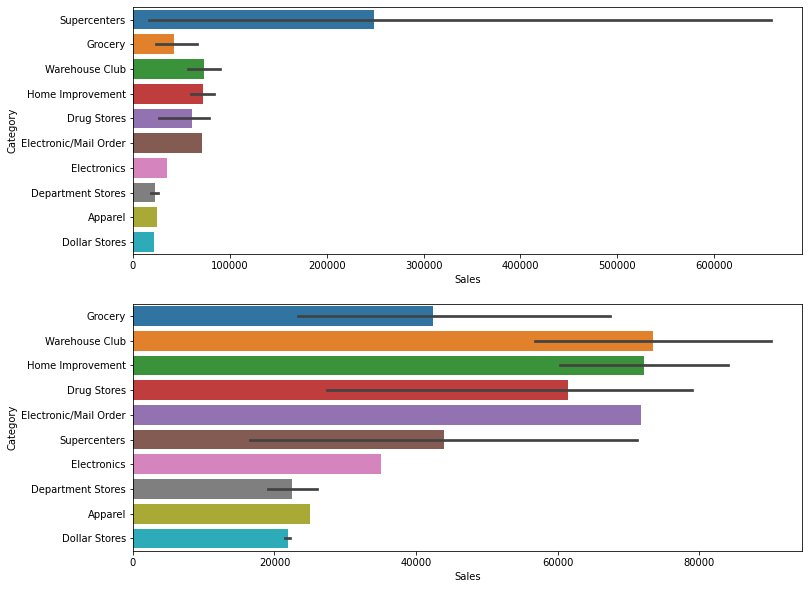

In [ ]:
df.loc[10,'Category']='Warehouse Club'
df_without_walmart.loc[10,'Category']='Warehouse Club'
fig,(ax,bx)=plt.subplots(2,1,figsize=(12,10))
#Tomando en cuenta el dataset que tiene Walmart
sn.barplot(data=df,x='Sales',y='Category',ax=ax)
#Tomando en cuenta las 25 companias 
sn.barplot(data=df_without_walmart,x='Sales',y='Category',ax=bx)
a = df[df.Category=='Grocery']
a.Sales.sum()/len(a)

-En el primer caso la categoría que genera mas ventas es la de Supercenters. Esto se debe a que el promedio es muy sensible a valore atípicos y Walmart esta dentro de esta categoría.  

-Sin incluir a Walmart, tenemos que la categoría que mas ventas promedio genera es Warehouse club.

 -Por lo que se puede decir que es una buena categoría en la que se puede dedicar esfuerzos, y vender ese tiempo de productos.

-También se puede observar que las Categorías Electronic/Mail Order , Electronic y Apparel, son categorías donde solo hay una compañía, por lo que hay una oportunidad para hacer competencia. 

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Text(0.5, 1.0, 'Ventas de acuerdo a la cantidad de tiendas')

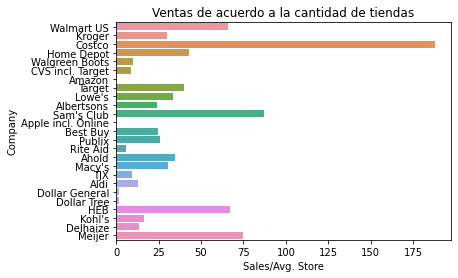

In [ ]:
#En esta ocasion tomamos las ventas promedio por tienda 
sn.barplot(data=df,x='Sales/Avg. Store',y='Company')
plt.title('Ventas de acuerdo a la cantidad de tiendas')

-Las empresa que mayor venta tiene en relación con su numero de tiendas es Costco, es decir, es sus diferentes tiendas las ventas son parecidas por lo que el promedio de ventas por tienda es un valor muy cercano a la realidad.

-La compañía Costco vende productos de las categoría Warehouse Club, que es la categoría de empresas que generan mas ventas en el Top 5 anterior.

-Hay equilibrio entre su cantidad de ventas y su numero de tiendas. Este podría ser un factor de tener ventas mas altas ya que es la tercera empresa con ventas mas altas y es la que ventas tiene dentro de su categoría. 

-Esta empresa seria el competidor mas grande si se quiere vender productos dentro de esta categoría. 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Empresas con ventas exclusivamente online


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,relation sales-store
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN


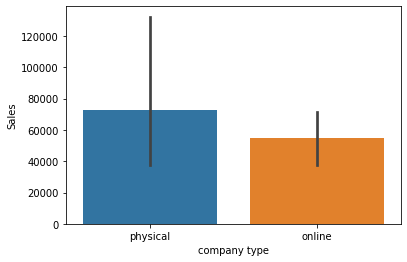

In [ ]:
#Las companias que no tienen tiendas fisicas se entiende que tienen ventas online 
online_companies = df[df.Stores.isna()]
#Agregando una nueva columna al DF 
df['company type']=['online' if i else 'physical' for i in df.Stores.isna()]

#sn.displot(data=df,x='Sales',hue='is_online',multiple='stack')
sn.barplot(data=df,y='Sales',x='company type')
print("Empresas con ventas exclusivamente online")
online_companies

-Las empresas que tienen ventas exclusivamente online no están muy por debajo en cuanto a números de las que tienen ventas en tiendas físicas a pesar de que son menos.

-Hay una gran oportunidad en las empresas con ventas online ya que el mínimo de ventas esta muy cerca del mínimo de ventas de las empresas que tienen ventas físicas, mas no así el máximo. De igual manera hay pocas empresas con ventas online por lo que se podría incursionar esta modalidad de ventas.

## III. Tus propias preguntas

### 10. ¿Se puede inferir las ventas de una empresa con la suma de las ventas de las tiendas que posee?

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Ventas vs El promedio de ventas por el numero de tiendas')

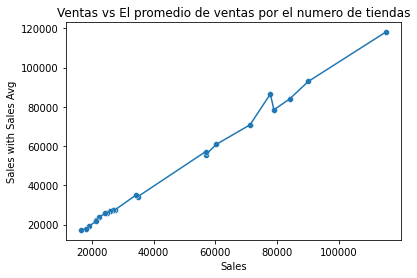

In [ ]:
#Para saber eso multiplicamos las tiendas por el promedio de ventas por tienda
df_without_walmart['Sales with Sales Avg']=df_without_walmart.Stores*df['Sales/Avg. Store']
#Luego vemos si estas dos medidas se corresponden en grafico de dispersion o un lmplot
sn.scatterplot(data=df_without_walmart,x='Sales',y='Sales with Sales Avg')
sn.lineplot(data=df_without_walmart,x='Sales',y='Sales with Sales Avg')
plt.title('Ventas vs El promedio de ventas por el numero de tiendas')

-Se observa que la correlación de la ventas con las ventas calculadas del promedio de ventas por el numero de tiendas tienda a ser lineal.

-Con este hecho podríamos inferir el total de ventas que tendrá la empresa con la suma de las ventas de las tiendas. 

### 11. ¿Cuantas compañías tiene cada categoría? ¿Se podría decir que entre más empresas haya en una categoría más ventas generan estas categorías?

[Text(0.5, 1.0, 'Ventas por categoría')]

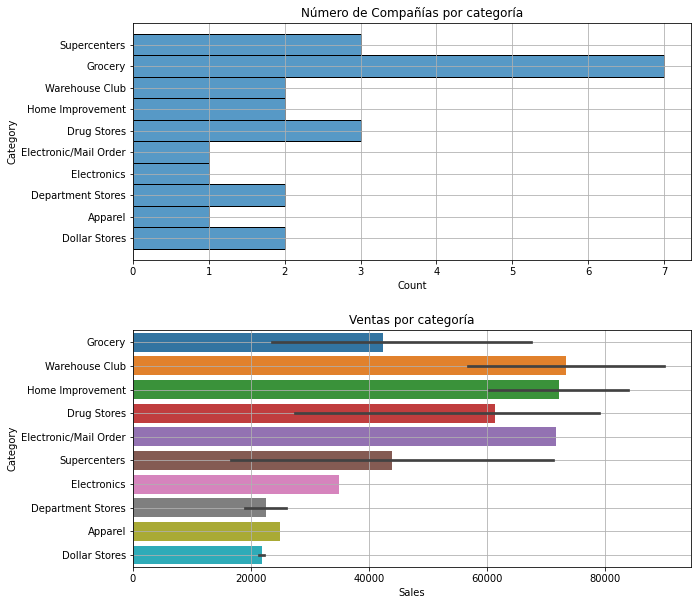

In [ ]:
fig,(ax,bx)=plt.subplots(2,1,figsize=(10,10))
sn.histplot(data=df,y='Category',ax=ax)
sn.barplot(data=df_without_walmart,x='Sales',y='Category',ax=bx)
plt.subplots_adjust(hspace=0.3)
ax.grid()
bx.grid()
ax.set(title='Número de Compañías por categoría')
bx.set(title='Ventas por categoría')

- Se puede observar que las categorías que presentan mas compañías es la "Grocery" con 7. 

- Sin embargo Grocery no es la categoría con mas ventas.

- De hechos la categorías donde se generan mas ventas son las que cuentas con menos empresas. Esto se debe a que al ser pocas empresas, estas venden mas. 

- También debemos ver otros factores del porque estas categorías generan tantas ventas. 

- Sin embargo nuevamente se puede decir que conviene adentrarse a vender productos de estas categorías que poseen pocas empresas, pues no habrá mucha competencia.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5dc74111-d178-4c52-8441-627cfa0f2abf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>